# Importing statements

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Processing data

In [3]:
df = pd.read_csv('Clustering_Data.csv')

df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


Drop non-numerical or categorical data

In [4]:
df = df.drop(['Customer_Segment'], axis=1) 

df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## Standerization of data

In [5]:
data_standardized = (df - df.mean()) / df.std()

data_standardized

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.873810,2.966176,0.304301,0.300954,-0.331985,-0.982841,-1.420891,1.270726,-0.927563,1.139596,-1.388840,-1.227742,-0.021890
174,0.491955,1.408636,0.413653,1.049555,0.158126,-0.791103,-1.280731,0.547563,-0.316058,0.967055,-1.126341,-1.481267,0.009866
175,0.331822,1.739837,-0.388260,0.151234,1.418411,-1.126646,-1.340800,0.547563,-0.420888,2.217979,-1.607590,-1.481267,0.279786
176,0.208643,0.227053,0.012696,0.151234,1.418411,-1.030776,-1.350811,1.351077,-0.228701,1.829761,-1.563840,-1.396759,0.295664


# Defining all the function

## squared euclidean distance

Euclidean sq means normal distance between 2 points.(normal maths) 

In [6]:
def squared_euclidean_distance(point_a, point_b):
    return np.sum((point_a - point_b) ** 2, axis=1)

## assign clusters

assign means the function sees that which distance least to the centroid and tells it as the cluster number

In [7]:
def assign_clusters(data, centroids):
    distances = []
    for _, centroid in centroids.iterrows():
        distances.append(squared_euclidean_distance(data, centroid))
    
    distances = pd.concat(distances, axis=1)
    return pd.DataFrame(distances.idxmin(axis=1) + 1, columns=['Cluster'])


## compute new centroids

New centroids are assignment by the mean of the points of the respective clusters

In [8]:
def compute_new_centroids(data, clusters):
    combined = pd.concat([data, clusters], axis=1)
    new_centroids = combined.groupby('Cluster').mean()
    return new_centroids.reset_index(drop=True)

## K-means algorithm

In [9]:
def kmeans(data, k, max_iterations=69):
    centroids = data.sample(k)  # Randomly initialize k centroids
    clusters = assign_clusters(data, centroids)

    distance_history = []
    for i in range(max_iterations):
        new_centroids = compute_new_centroids(data, clusters)
        if new_centroids.equals(centroids):
            print("\n*** Convergence reached at iteration", i, "***\n")
            break
        centroids = new_centroids
        clusters = assign_clusters(data, centroids)

        # Calculate total distance for this iteration
        total_distance = np.sum([squared_euclidean_distance(data.iloc[j], centroids.iloc[clusters.iloc[j] - 1]) for j in range(data.shape[0])])
        print(f"Iteration {i}: Total distance from centroids: {total_distance}")
        distance_history.append(total_distance)

    return clusters, centroids

## Calculate Within-Cluster Sum of Squares (WCSS)

sum of all distances of the points to the centroid for all the clusters

In [10]:
def calculate_wcss(data, clusters, centroids):
    wcss = 0
    for i in range(centroids.shape[0]): 
        cluster_points = data[clusters['Cluster'] == i + 1]  
        wcss += np.sum(np.sum((cluster_points - centroids.iloc[i]) ** 2, axis=1)) 
    return wcss  

## Calculate variance of clusters

In [11]:
def calculate_cluster_variance(cluster_data):
    points = np.array([d['point'] for d in cluster_data])
    centroids = np.array([d['centroid'] for d in cluster_data])
    unique_centroids, indices = np.unique(centroids, axis=0, return_inverse=True)
    cluster_variances = []
    for i in range(len(unique_centroids)):
        cluster_points = points[indices == i]
        if len(cluster_points) > 0:
            centroid = unique_centroids[i]
            variance = np.mean(np.sum((cluster_points - centroid) ** 2, axis=1))
            cluster_variances.append(variance)
        else:
            cluster_variances.append(0)
    return cluster_variances

## Visualize clustering process using PCA

In [12]:
def visualize_clusters(data, centroids, clusters, iteration):
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)
    reduced_centroids = pca.transform(centroids)

    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters['Cluster'], alpha=0.5)
    plt.scatter(reduced_centroids[:, 0], reduced_centroids[:, 1], marker='s', c='red', s=100)
    plt.title(f'Cluster Visualization - Iteration {iteration}')
    plt.grid(True)
    plt.show()

# Elbow method for clustering

In [13]:
max_clusters = 10
wcss_values = []
for k in range(1, max_clusters + 1):
    cluster_assignments, centroids = kmeans(data_standardized, k)
    wcss_values.append(calculate_wcss(data_standardized, cluster_assignments, centroids))


Iteration 0: Total distance from centroids: 2301.0

*** Convergence reached at iteration 1 ***

Iteration 0: Total distance from centroids: 1801.6494274962793
Iteration 1: Total distance from centroids: 1666.8931587635675
Iteration 2: Total distance from centroids: 1655.4419350510843
Iteration 3: Total distance from centroids: 1653.072577590436
Iteration 4: Total distance from centroids: 1652.8395299742651

*** Convergence reached at iteration 5 ***

Iteration 0: Total distance from centroids: 2043.9294859227118
Iteration 1: Total distance from centroids: 1655.7151981049715
Iteration 2: Total distance from centroids: 1310.7167858027692
Iteration 3: Total distance from centroids: 1273.740306817628
Iteration 4: Total distance from centroids: 1271.295594661422
Iteration 5: Total distance from centroids: 1270.7491153118067

*** Convergence reached at iteration 6 ***

Iteration 0: Total distance from centroids: 1507.9521801125213
Iteration 1: Total distance from centroids: 1386.094037200838

In [14]:
wcss_values

[np.float64(2301.0),
 np.float64(1652.8395299742651),
 np.float64(1270.7491153118071),
 np.float64(1219.3095310071133),
 np.float64(1103.6392734413807),
 np.float64(1053.0396319652689),
 np.float64(1026.3450843811515),
 np.float64(943.729965515897),
 np.float64(977.7866403219318),
 np.float64(894.2467616806529)]

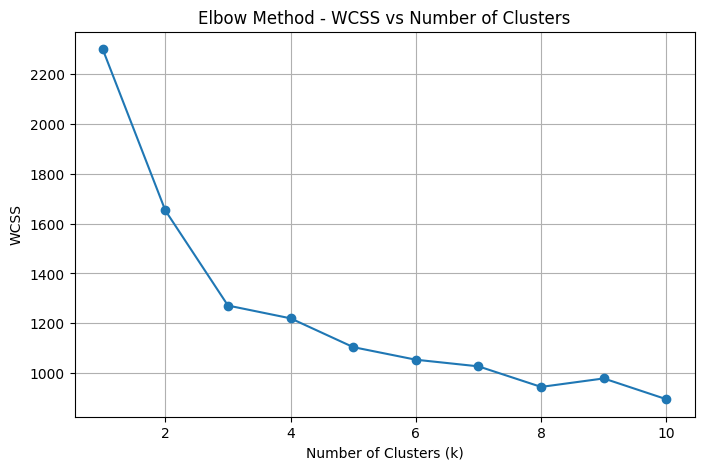

In [15]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_clusters + 1), wcss_values, marker='o')
plt.title('Elbow Method - WCSS vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

From the above graph we can clearly see that K=3 is a good choice as there is a elbow plot.

# Visualizeing clustering process using PCA

## K = 3 (from the graph)

Iteration 0: Total distance from centroids: 2038.3521520624652
Iteration 1: Total distance from centroids: 1812.6910374202232
Iteration 2: Total distance from centroids: 1696.992558161236
Iteration 3: Total distance from centroids: 1612.1521854364726
Iteration 4: Total distance from centroids: 1501.0204404744413
Iteration 5: Total distance from centroids: 1396.3182041772861
Iteration 6: Total distance from centroids: 1318.0582434564985
Iteration 7: Total distance from centroids: 1286.9555342701583
Iteration 8: Total distance from centroids: 1275.4704524792655
Iteration 9: Total distance from centroids: 1272.8254354471073
Iteration 10: Total distance from centroids: 1271.5767270613828

*** Convergence reached at iteration 11 ***



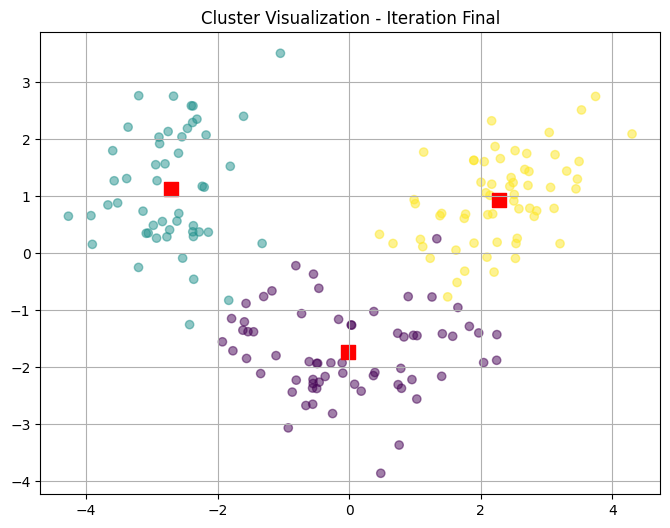

In [16]:
final_clusters, final_centroids = kmeans(data_standardized, 3)
visualize_clusters(data_standardized, final_centroids, final_clusters, iteration='Final')

here red are the centroids<br>
there are 3 clusters (purple , blue and yellow)<br>

In [17]:
print("Final Centroids:",final_centroids)

Final Centroids:     Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0 -0.936362   -0.390863 -0.437966      0.208400  -0.462469      -0.053198   
1  0.164444    0.869095  0.186373      0.522892  -0.075260      -0.976575   
2  0.875627   -0.303720  0.318045     -0.662654   0.563299       0.874040   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0    0.066716             -0.019766         0.064610        -0.879594   
1   -1.211829              0.724021        -0.777513         0.938890   
2    0.940985             -0.583943         0.580146         0.166718   

        Hue     OD280   Proline  
0  0.451708  0.288923 -0.753899  
1 -1.161512 -1.288776 -0.405943  
2  0.482367  0.764896  1.155089  


Theese are the final centroids of the features